In [5]:
from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns 

from sklearn import metrics
%matplotlib inline

In [6]:
digits = load_digits() 

In [7]:
digits.data.shape

(1797, 64)

In [8]:
digits.target.shape

(1797,)

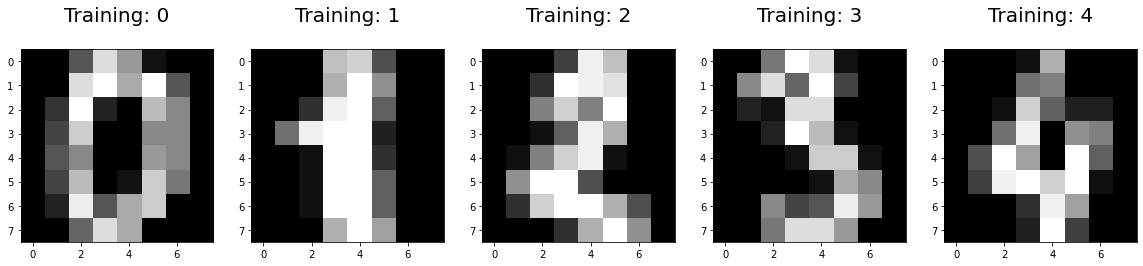

In [9]:
plt.figure(figsize=(20,4))
for index, (image,label) in enumerate(zip(digits.data[0:5], digits.target[0:5])):
    plt.subplot(1,5,index+1)
    plt.imshow(np.reshape(image,(8,8)),cmap=plt.cm.gray)
    plt.title('Training: %i\n' %label,fontsize = 20)

In [10]:
x_train,x_test, y_train, y_test = train_test_split(digits.data,digits.target, test_size=0.25,random_state=0)

In [11]:
print(x_train.shape)

(1347, 64)


In [12]:
print(y_train.shape)

(1347,)


In [13]:
print(x_test.shape)

(450, 64)


In [14]:
print(y_test.shape)

(450,)


In [20]:
from sklearn.linear_model import LogisticRegression

In [21]:
logisticRegr = LogisticRegression()

In [22]:
logisticRegr

LogisticRegression()

In [23]:
logisticRegr.fit(x_train, y_train)

c:\Python310\lib\site-packages\sklearn\linear_model\_logistic.py:444: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [25]:
logisticRegr.predict(x_test[0].reshape(1,-1))

array([2])

In [27]:
logisticRegr.predict(x_test[0:10])

array([2, 8, 2, 6, 6, 7, 1, 9, 8, 5])

In [28]:
predictions = logisticRegr.predict(x_test)

In [29]:
predictions.shape

(450,)

In [30]:
score = logisticRegr.score(x_test, y_test)
print(score)

0.9511111111111111


In [37]:
from sklearn.metrics import plot_confusion_matrix

In [40]:
def plot_confusion_matrix(cm, title = 'Confusion matrix',cmap = 'Pastel1'):
    plt.figure(figsize=(9,9))
    plt.imshow(cm,interpolation='nearest',cmap = cmap)
    plt.title(title,size= 15)
    plt.colorbar()
    tick_marks = np.arange(10)
    plt.xticks(tick_marks, ["0","1","2","3","4","5","6","7","8","9"],rotation=45,size=10)
    plt.yticks(tick_marks, ["0","1","2","3","4","5","6","7","8","9"],size=10)
    plt.tight_layout()
    plt.ylabel('Actual label',size =15)
    plt.xlabel('Predicted label',size =15)
    width, height = cm.shape
    
    for x in range(width):
        for y in range(height):
            plt.annotate(str(cm[x][y]), xy=(y,x),
                        horizontalalignment= 'center',
                        verticalalignment = 'center')    

Confusion matrix
[[37  0  0  0  0  0  0  0  0  0]
 [ 0 40  0  0  0  0  0  0  2  1]
 [ 0  1 40  3  0  0  0  0  0  0]
 [ 0  0  0 43  0  0  0  0  1  1]
 [ 0  0  0  0 37  0  0  1  0  0]
 [ 0  0  0  0  0 46  0  0  0  2]
 [ 0  1  0  0  0  0 51  0  0  0]
 [ 0  0  0  1  1  0  0 46  0  0]
 [ 0  3  1  0  0  0  0  0 43  1]
 [ 0  0  0  0  0  1  0  0  1 45]]


<Figure size 432x288 with 0 Axes>

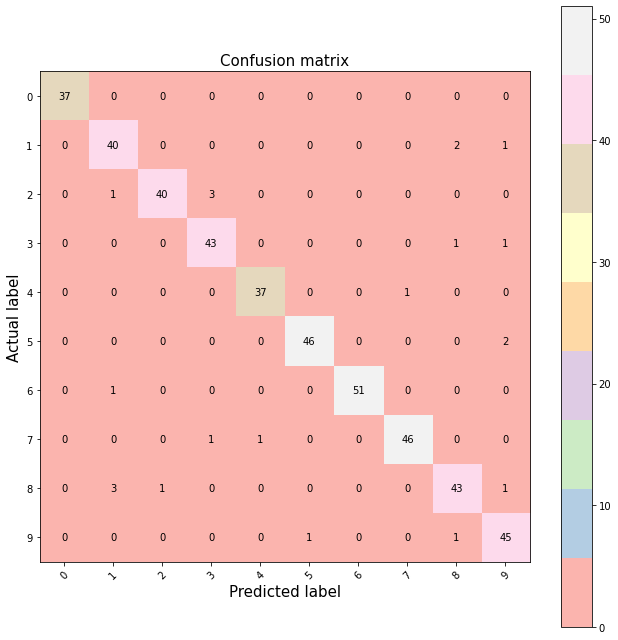

In [41]:
confusion = metrics.confusion_matrix(y_test, predictions)
print('Confusion matrix')
print(confusion)
plt.figure()
plot_confusion_matrix(confusion);
plt.show();


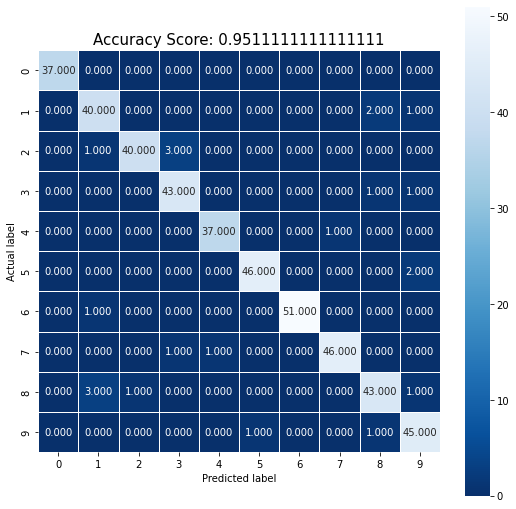

In [43]:
predictions = logisticRegr.predict(x_test)
cm = metrics.confusion_matrix(y_test,predictions)
plt.figure(figsize=(9,9))
sns.heatmap(cm,annot =True, fmt =".3f", linewidths=.5, square=True, cmap= 'Blues_r');
plt.ylabel('Actual label');
plt.xlabel('Predicted label');
all_sample_title = 'Accuracy Score: {0}'.format(score)
plt.title(all_sample_title, size = 15);